#                                    NASA ASTEROID CLASSIFICATION PROJECT 

STEPS

In [1]:
NASA ASTEROID PREDICTION

DATASET FROM  KAGGLE

TOPICS TO BE COVERED:
1.EDA(VISUALIZATION)
2.DATA PREPOCESSING
3.LINEAR REGRESION 
4.DECISION TREE CLASSIFIER
6.LOGISTIC REGRESSION
7.GAUSSIAN NAIVE BAYES
8.FEATURE SELECTION,CROSS VALIDATION ,HYPERPARAMETER TUNING-GRID SEARCH,RANDOMISED CV BOTH,RUC AUC GRAPH FOR ALL THE MODELS
9.PCA AND MULTICOLLINEARITY CHECK

SyntaxError: ignored

# Brief intro about the dataset:
    
I thought of using machine learning to predict whether an asteroid could be hazardous or not.
Searching on Kaggle, I found NASA’s dataset about some of the asteroids discovered so far. The dataset contains various information about the asteroids and labels each asteroid as hazardous or non-hazardous.

The data is about Asteroids and is provided by NEOWS(Near-Earth Object Web Service)

The dataset consists of 4687 data instances(rows) and 40 features(columns).

'MISS DIST.(ASTRONOMICAL)':it denotes the distance of asteroid from the earth wrt its distance of the earth to sun
 and measured as 1AU.   

‘Neo Reference ID’: This feature denotes the reference ID assigned to an asteroid.

‘Name’: This feature denotes the name given to an asteroid.

‘Absolute Magnitude’: This feature denotes the absolute magnitude of an asteroid. An asteroid’s absolute magnitude is the visual magnitude an observer would record if the asteroid were placed 1 Astronomical Unit (AU) away, and 1 AU from the Sun and at a zero phase angle.

‘Est Dia in KM(min)’: This feature denotes the estimated diameter of the asteroid in kilometres (KM).

‘Relative Velocity km per sec’: This feature denotes the relative velocity of the asteroid in kilometre per second.

‘Orbiting Body’: This feature denotes the planet around which the asteroid is revolving.

‘Eccentricity’: This feature denotes the value of eccentricity of the asteroid’s orbit. Just like many other bodies in the solar system, the realms made by asteroids are not perfect circles, but ellipses. The axis marked eccentricity is a measure of how far from circular each orbit is: the smaller the eccentricity number, the more circular the realm.

                
‘Hazardous’: This feature denotes whether the asteroid is hazardous or not.
    

1. VISUALIZATION:EDA

In [5]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [7]:
#Importing the dataset
dataset=pd.read_csv("nasa.csv",encoding='latin-1')
dataset

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,6.275369e+07,3.899334e+07,Earth,17,2017-04-06 08:36:37,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,5.729815e+07,3.560342e+07,Earth,21,2017-04-06 08:32:49,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7.622912e+06,4.736658e+06,Earth,22,2017-04-06 09:20:19,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,1995-01-15,790156800000,11.173874,40225.948191,24994.839864,0.285322,110.990387,4.268362e+07,2.652237e+07,Earth,7,2017-04-06 09:15:49,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-15,790156800000,9.840831,35426.991794,22012.954985,0.407832,158.646713,6.101082e+07,3.791037e+07,Earth,25,2017-04-06 08:57:58,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,3759007,3759007,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,323.612307,2016-09-08,1473318000000,22.154265,79755.354273,49556.875548,0.041361,16.089413,6.187511e+06,3.844741e+06,Earth,4,2017-04-06 08:24:07,8,0.019777,5.156,2457637.5,0.361512,1.161429,39.880491,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,J2000,False
4683,3759295,3759295,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,44.670934,2016-09-08,1473318000000,3.225150,11610.539577,7214.337772,0.006469,2.516399,9.677324e+05,6.013211e+05,Earth,2,2017-04-06 08:23:58,6,0.006451,5.742,2458000.5,0.073200,1.075134,5.360249,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,J2000,False
4684,3759714,3759714,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,562.373736,2016-09-08,1473318000000,7.191642,25889.910626,16086.983633,0.061009,23.732393,9.126775e+06,5.671115e+06,Earth,17,2017-04-06 08:23:43,6,0.059973,4.410,2458000.5,0.368055,1.528234,4.405467,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,J2000,False
4685,37597

In [8]:
#Dropping the Redundant and outliner columns
dataset.drop( ['Close Approach Date'], axis = 1, inplace = True)


In [9]:
dataset.drop( ['Orbiting Body'], axis = 1, inplace = True)


In [10]:
dataset.drop( ['Orbit Determination Date'], axis = 1, inplace = True)


In [11]:
dataset.drop( ['Equinox'], axis = 1, inplace = True)


In [12]:
dataset.drop(dataset.iloc[:,[0,1,2,4,5,6,7,8,9,10,11,13,14,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]],axis=1, inplace = True)

In [13]:
dataset

,Est Dia in KM(min),Relative Velocity km per sec,Miss Dist.(Astronomical),Hazardous
0,0.127220,6.115834,0.419483,True
1,0.146068,18.113985,0.383014,False
2,0.231502,7.590711,0.050956,True
3,0.008801,11.173874,0.285322,False
4,0.127220,9.840831,0.407832,True
...,...,...,...,...
4682,0.044112,22.154265,0.041361,False
4683,0.006089,3.225150,0.006469,False
4684,0.076658,7.191642,0.061009,False
4685,0.116026,11.352090,0.260760,False


In [14]:
#UNIVARATE SELECTION-Dividing the dataset into dependent and independant variables
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1]

In [15]:
X

,Est Dia in KM(min),Relative Velocity km per sec,Miss Dist.(Astronomical)
0,0.127220,6.115834,0.419483
1,0.146068,18.113985,0.383014
2,0.231502,7.590711,0.050956
3,0.008801,11.173874,0.285322
4,0.127220,9.840831,0.407832
...,...,...,...
4682,0.044112,22.154265,0.041361
4683,0.006089,3.225150,0.006469
4684,0.076658,7.191642,0.061009
4685,0.116026,11.352090,0.260760


In [16]:
Y

0        True
1       False
2        True
3       False
4        True
        ...  
4682    False
4683    False
4684    False
4685    False
4686    False
Name: Hazardous, Length: 4687, dtype: bool

In [17]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

In [18]:
Y

array([1, 0, 1, ..., 0, 0, 0])

In [19]:
#First five rows
dataset.head(5)

,Est Dia in KM(min),Relative Velocity km per sec,Miss Dist.(Astronomical),Hazardous
0,0.127220,6.115834,0.419483,True
1,0.146068,18.113985,0.383014,False
2,0.231502,7.590711,0.050956,True
3,0.008801,11.173874,0.285322,False
4,0.127220,9.840831,0.407832,True


In [20]:
#Last five rows
dataset.tail()

,Est Dia in KM(min),Relative Velocity km per sec,Miss Dist.(Astronomical),Hazardous
4682,0.044112,22.154265,0.041361,False
4683,0.006089,3.225150,0.006469,False
4684,0.076658,7.191642,0.061009,False
4685,0.116026,11.352090,0.260760,False
4686,0.400641,35.946852,0.462372,False


In [21]:
# Let's count the Number of aestoroids which are hazardous and not hazardous
is_Hazardous = dataset[dataset['Hazardous']==1]
not_Hazardous=dataset[dataset['Hazardous']== 0]
dataset.Hazardous.value_counts()

False    3932
True      755
Name: Hazardous, dtype: int64

In [22]:
# Counting some values
print('Total = ',len(dataset))
print('Number of aestoroids which are hazardous = ',len(is_Hazardous))
print('Percentage hazardous aestoroids = ', len(is_Hazardous)/len(dataset) * 100, "%")
print('not hazardous aesteroids =', len(not_Hazardous))
print('Percentage not hazardous aestoroids  = ', len(not_Hazardous)/len(dataset) * 100, "%")


Total =  4687
Number of aestoroids which are hazardous =  755
Percentage hazardous aestoroids =  16.108384894388735 %
not hazardous aesteroids = 3932
Percentage not hazardous aestoroids  =  83.89161510561127 %


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


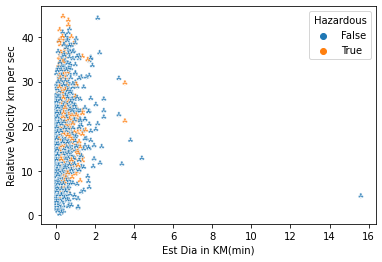

In [23]:
# plot the scatterplot of 'Est Dia in KM(min)' versus 'Relative Velocity km per sec'
sns.scatterplot(dataset['Est Dia in KM(min)'],dataset['Relative Velocity km per sec'], alpha=0.8, marker=r'$\clubsuit$',hue = dataset['Hazardous'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


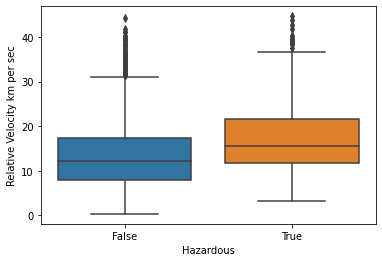

In [24]:
# plotting the boxplot to see the average 'Relative Velocity km per sec' of the aestoroids which were hazardous and not hazardous
sns.boxplot(dataset['Hazardous'],dataset['Relative Velocity km per sec'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


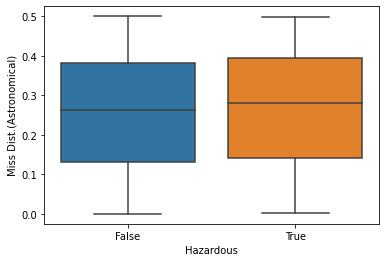

In [25]:
# plotting the boxplot to see the average 'Relative Velocity km per sec' of the aestoroids which were hazardous and not hazardous
sns.boxplot(dataset['Hazardous'],dataset['Miss Dist.(Astronomical)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


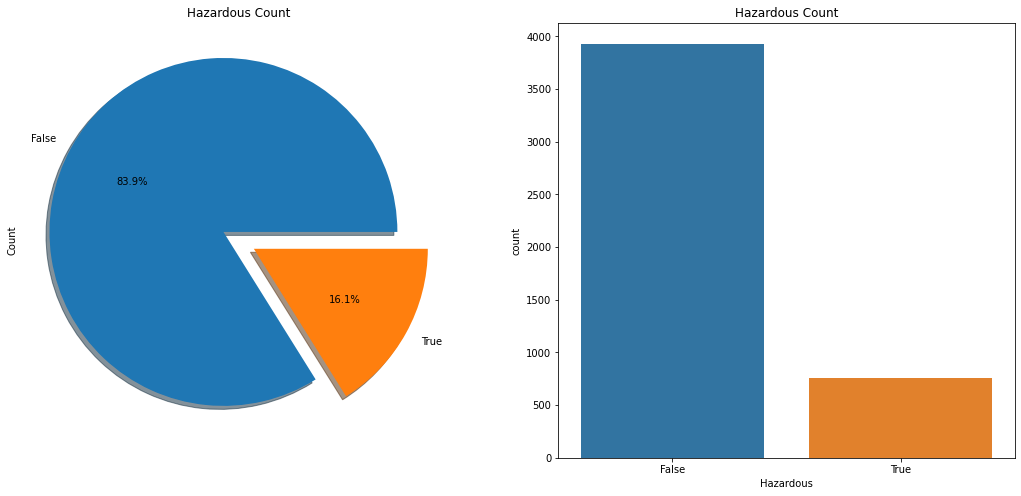

In [26]:
#plotting the barplot and pie chart to see the average 'Est Dia in KM(min)' of the aestoroids which were hazardous and not hazardous

f,ax=plt.subplots(1,2,figsize=(18,8))
dataset['Hazardous'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Hazardous Count')
ax[0].set_ylabel('Count')
sns.countplot(dataset.Hazardous)
ax[1].set_title('Hazardous Count')
plt.show()

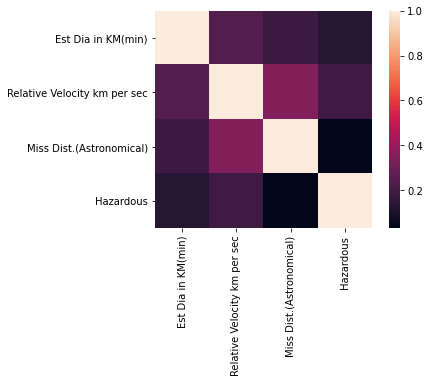

In [27]:
# correlation matrix
corrmat = dataset.corr()
f, ax = plt.subplots()
sns.heatmap(corrmat, vmax = 1, square = True)

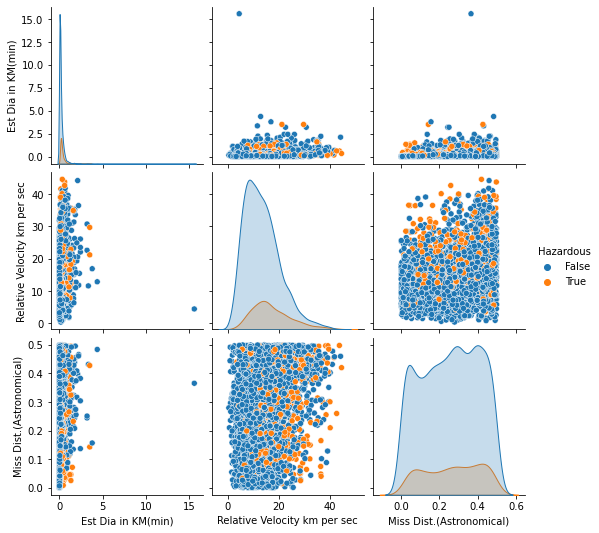

In [28]:
# plotting the pairplot to see the relation btw target and features, to remove outliners
sns.pairplot(dataset,hue='Hazardous')
plt.show()

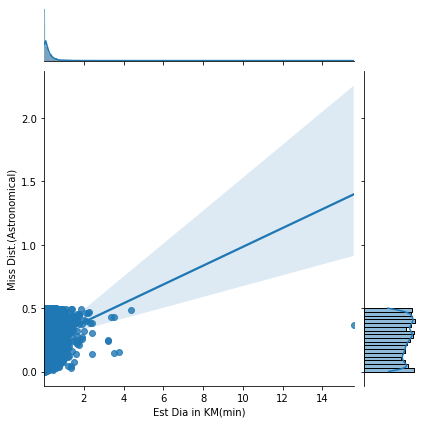

In [29]:
# made joinplot as type of linear regression to see relationship and the value range btw 2 features
sns.jointplot(x='Est Dia in KM(min)',y='Miss Dist.(Astronomical)',data=dataset,kind='reg')

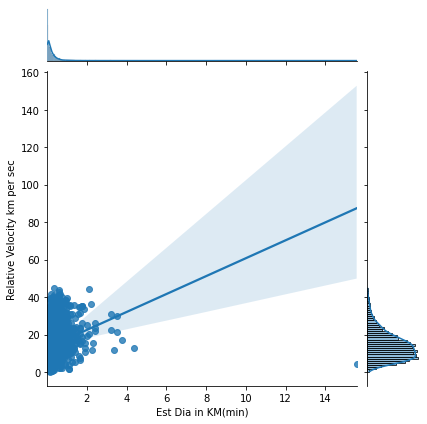

In [30]:
sns.jointplot(x='Est Dia in KM(min)',y='Relative Velocity km per sec',data=dataset,kind='reg')

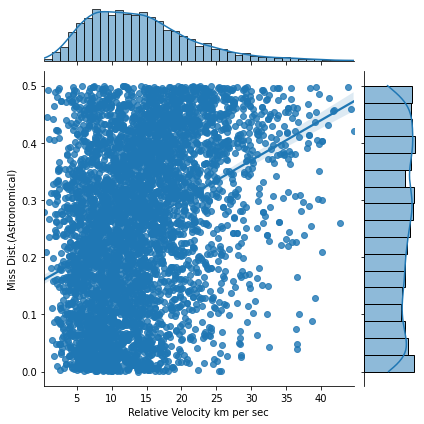

In [31]:
sns.jointplot(x='Relative Velocity km per sec',y='Miss Dist.(Astronomical)',data=dataset,kind='reg')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


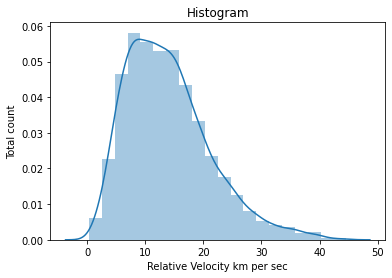

In [32]:
# histgram and kde as standard gaussian graph normalizing the value from 0-1 
sns.distplot(dataset['Relative Velocity km per sec'],bins=20)
plt.xlabel("Relative Velocity km per sec")
plt.ylabel("Total count")
plt.title("Histogram")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


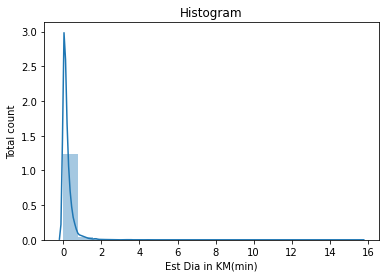

In [33]:
sns.distplot(dataset['Est Dia in KM(min)'],bins=20)
plt.xlabel("Est Dia in KM(min)")
plt.ylabel("Total count")
plt.title("Histogram")
plt.show()



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


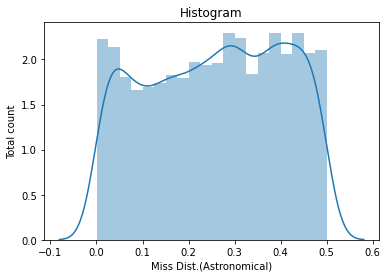

In [34]:
sns.distplot(dataset['Miss Dist.(Astronomical)'],bins=20)
plt.xlabel("Miss Dist.(Astronomical)")
plt.ylabel("Total count")
plt.title("Histogram")
plt.show()